# AMAT503:  Lecture 19

March 22, 2018.

Michael Lamoureux

We are doing multiresolution analysis, applied to real functions on the line.


In [135]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from matplotlib.pyplot import *
from pywt import *

## 1. Multiresolution Analysis - applied

We want to do a multiresolution analysis on some real functions. You might need to look at the last class's lecture notes to see the details.

We start with a function $f(t)$ and a scaling function $\phi(t)$ in the space $V_0$ and write down some coefficients

 $$y_k = \int f(t) \overline{\phi(t-k)} \, dt. $$
 
 We then apply the corresponding discrete wavelet transform to get coefficients for the multiresolution analysis. This way, function $f$ is expressed as a linear combination of scaled versions of the wavelet functions (and a scaled version of the scaling function.)


We start by defining a function:

In [42]:
def f(t):
    return (t>0)+ .5*(t>1) + .3*(t>2) + .2*(t>3)


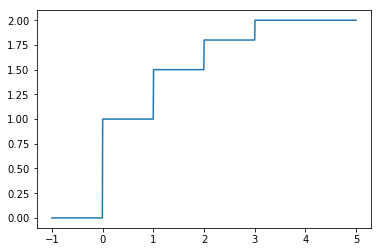

In [137]:
t = linspace(-1,5,1000)
plot(t,f(t));

Let's get our scaling function, and wavelet function.

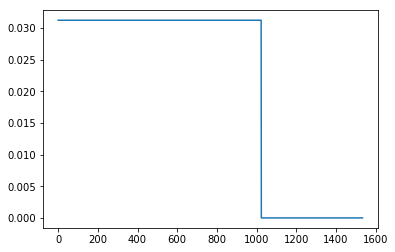

In [116]:
w = Wavelet('db1')
h = w.dec_lo
z = [1]
for k in range(10):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x
    
phi = x
plot(phi);

In [104]:
size(phi)

1535

In [105]:
# Check normalization, sum of squares should be one.
sum(phi**2)

1.0000000000000002

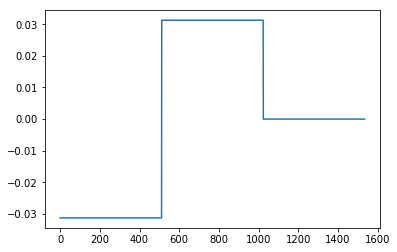

In [124]:
w = Wavelet('db1')
h = w.dec_lo
g = w.dec_hi
z = [1]
x = convolve(z,g)
z = zeros(2*size(x))
z[0:size(z):2] = x

for k in range(9):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x

psi = x
plot(psi);

In [106]:
# Compute the initial scaling coefficient. 

N = 10
y = zeros(N,float_)
t = linspace(0,1,size(phi))
dt = 1/size(phi)
for k in range(N):
    y[k] = sum(f(t+k)*phi)
    
y

array([ 31.96875 ,  47.984375,  57.590625,  63.99375 ,  64.      ,
        64.      ,  64.      ,  64.      ,  64.      ,  64.      ])

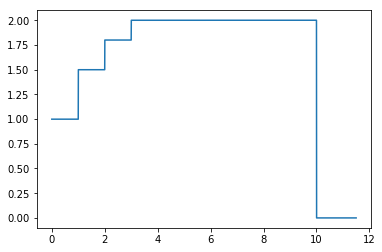

In [114]:
# Let's build a reconstruction of f from these coefficients

f_len = 1024*size(y) + size(phi)
f_recon = zeros(f_len, float_)

for k in range(size(y)):
    f_recon[(1024*k):(1024*k+size(phi))] = f_recon[(1024*k):(1024*k+size(phi))] + y[k]*phi
    
plot(linspace(0,size(f_recon)/1024,size(f_recon)),f_recon);

In [125]:
## Let's compute some wavelet coefficients

(cA, cD) = dwt(y, 'db1')
cA, cD

(array([ 56.53539686,  85.97313605,  90.50966799,  90.50966799,  90.50966799]),
 array([-11.32475704,  -4.52769311,   0.        ,   0.        ,   0.        ]))

We should be able to reconstruct f using these coefficients. 


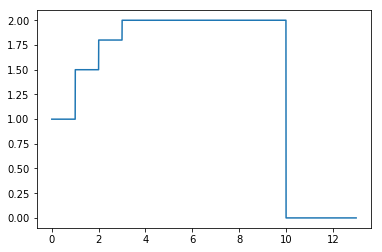

In [134]:
fw_len = 1024*size(cA) + size(phi)
fw_recon = zeros(fw_len, float_)

for k in range(size(cA)):
    fw_recon[(1024*k):(1024*k+size(phi))] = fw_recon[(1024*k):(1024*k+size(phi))] + \
        cA[k]*phi - cD[k]*psi
    
plot(linspace(0,size(fw_recon)/512,size(fw_recon)),fw_recon/sqrt(2));

Notice I had to put a sqrt(2) in the plot command to get this to work out correctly. You might want to think about that. (So do I.)

Now, of course we could repeat this discrete wavelet transform several times. The point is, we never have to computer inner products anymore to get the wavelet coefficients for the function. They just come out of the discrete wavelet algorith. This is a very powerful idea. 

### More complicated functions, wavelets

Let's see what happens if we use a more complicated function. Something with lots of wiggles and changes. I suggest we use a sinusoid that decays quickly. Maybe we can let the frequency change a lot.

We should then try to approximate using a wiggly Daubechies wavelets.

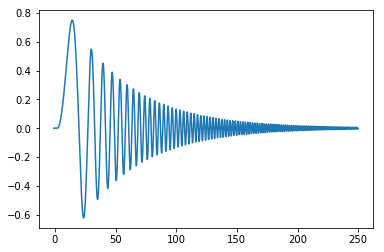

In [217]:
def f(t):
    return (t>2)*exp(-t/50)*sin(.01*(t-2)**2)

t=linspace(-1,250,1000)
plot(t,f(t));

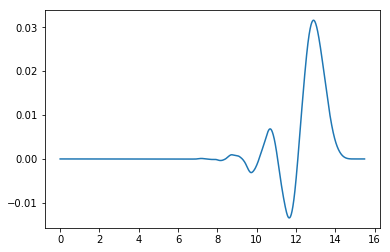

In [232]:
w = Wavelet('db8')
h = w.dec_lo
z = [1]
for k in range(10):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x
    
phi = x
plot(linspace(0,size(phi)/1024,size(phi)),phi);

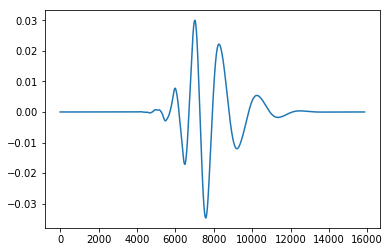

In [233]:
w = Wavelet('db8')
h = w.dec_lo
g = w.dec_hi
z = [1]
x = convolve(z,g)
z = zeros(2*size(x))
z[0:size(z):2] = x

for k in range(9):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x

psi = x
plot(psi);

In [234]:
# Compute the initial scaling coefficient. 

N = 250
y = zeros(N,float_)
t = linspace(0,1,size(phi))
dt = 1/size(phi)
for k in range(N):
    y[k] = sum(f(t+k)*phi)
    

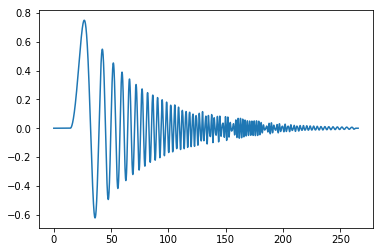

In [235]:
# Let's build a reconstruction of f from these coefficients

f_len = 1024*size(y) + size(phi)
f_recon = zeros(f_len, float_)

for k in range(size(y)):
    f_recon[(1024*k):(1024*k+size(phi))] = f_recon[(1024*k):(1024*k+size(phi))] + y[k]*phi
    
plot(linspace(0,size(f_recon)/1024,size(f_recon)),f_recon);

In [236]:
## Let's compute some wavelet coefficients

(cA, cD) = dwt(y, 'db8')
cA, cD

(array([  3.01750674e+01,   2.24816532e+01,   1.39375190e+01,
          6.69155231e+00,   1.77825217e+00,   1.45125108e-01,
         -4.90575612e-02,   1.45893530e-01,   2.82412388e+00,
          8.39090792e+00,   1.61713237e+01,   2.47966212e+01,
          3.18398238e+01,   3.38556104e+01,   2.74127217e+01,
          1.14476991e+01,  -9.81804628e+00,  -2.60118140e+01,
         -2.53542535e+01,  -5.33859009e+00,   1.89105167e+01,
          2.29576801e+01,   1.39871525e-01,  -2.17278328e+01,
         -1.07771646e+01,   1.67690478e+01,   1.29663404e+01,
         -1.52909071e+01,  -9.72579016e+00,   1.68379894e+01,
          1.15503654e+00,  -1.57698427e+01,   1.07682687e+01,
          4.27332003e+00,  -1.36330230e+01,   1.18190202e+01,
         -3.29345716e+00,  -5.24806152e+00,   1.00489185e+01,
         -1.08252647e+01,   9.06780832e+00,  -6.43415840e+00,
          4.01888852e+00,  -2.30076076e+00,   1.35643308e+00,
         -1.07633333e+00,   1.29202049e+00,  -1.81985724e+00,
        

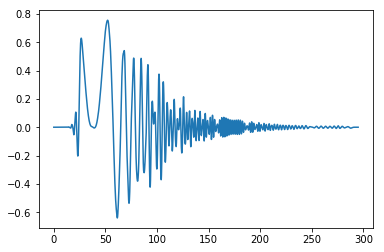

In [238]:
fw_len = 1024*size(cA) + size(phi)
fw_recon = zeros(fw_len, float_)

for k in range(size(cA)):
    fw_recon[(1024*k):(1024*k+size(phi))] = fw_recon[(1024*k):(1024*k+size(phi))] + \
        cA[k]*phi - cD[k]*psi
    
plot(linspace(0,size(fw_recon)/512,size(fw_recon)),fw_recon/sqrt(2));

In [239]:
## Let's explore orthogonality

phiOne = zeros(size(phi)+1024);
phiTwo = zeros(size(phi)+1024);

phiOne[0:size(phi)] = phi
phiTwo[1024:(1024+size(phi))] = phi

In [240]:
sum(phiOne*phiTwo)

9.110898138904068e-18

In [241]:
psiOne = zeros(size(psi)+1024);
psiTwo = zeros(size(psi)+1024);
psiOne[0:size(psi)] = psi
psiTwo[1024:(1024+size(psi))] = psi


In [242]:
sum(psiOne*psiTwo)

0.0

In [243]:
sum(psiOne*phiOne)

2.2768245622195593e-18

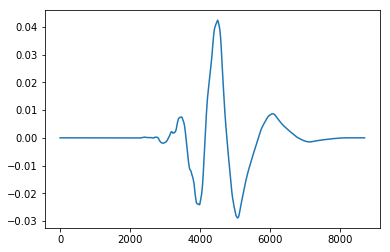

In [229]:
plot(psiTwo)

### Comments.

Well, some of those reconstructions are terrible!

Let's explore in class, might be interesting.
